# Linear Regression 

### Assumptions
1) Data and features must exhibit linear relationship
2) No/low  Mult-collinearity i.e features shouldn't be correlated with each other
3) Homoscedasticity- Error variance must be constant

# Mathematical Fourmulation
We model the relationship as:
 $$ \hat{y} = wx + b$$
 <br>
where

$y$ : Dependent variable(what we are trying to predict)<br>
$x$ : Independent varible(input matrix)<br>
$w$ : weight parameter that needs to be learned(slope)<br>
$b$ : bias parameter (intercept)<br>

# Loss function formulation

We use Mean squared error as it provides a smooth convex surface for optimization which allows for one global minimum and smooth gradient descent

$$
MSE =L(w,b) = \frac{1}{n} \sum_{i = 1}^{n}{(y - \hat{y})^2}
$$
<br>

Vectorized form:
$$
L(w,b) = \frac{1}{n} || y - (Xw + b)||^2
$$

# Gradient Descent

Gradient with respect to weights(w):

$$
\frac{\partial L}{\partial w} = - \frac{2}{n} X^T (y-\hat{y})
$$


Gradient with respect to bias(b):

$$
\frac{\partial L}{\partial b} =  \frac{2}{n}(y - \hat{y})
$$

# Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Create synthentic dataset
np.random.seed(42)

X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

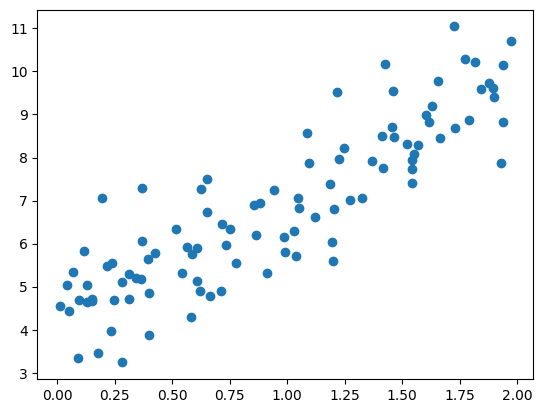

In [38]:
plt.scatter(X,y)
plt.show()

We want to model this data with a linear function

In [39]:
# Initialize paramters
w = np.random.randn(1,1)
b = 0.0

## Define functions

### Prediction

In [40]:
def predict(X,w,b):
    return X@w + b

### Loss

In [41]:
def MSE(y,y_hat):
    return (np.mean(y-y_hat)** 2)

### Gradients

In [42]:
def gradients(X,y,y_hat):
    n = len(y)
    dw = -(2/n) * X.T @ (y-y_hat)
    db = -(2/n) * np.sum(y-y_hat)
    return dw,db

## Training

In [50]:
epochs = 100
learning_rate = 0.01

losses = []
for i in range(epochs):
    y_hat = predict(X,w,b)

    loss = MSE(y,y_hat)

    losses.append(loss)

    dw,db = gradients(X,y,y_hat)

    w -= learning_rate * dw
    b -= learning_rate * db




In [51]:
prediction = predict(X,w,b)

## Visualization

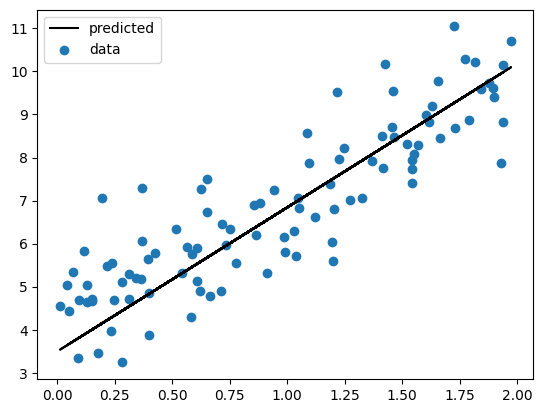

In [54]:
plt.plot(X,prediction,label = "predicted",color="black")
plt.scatter(X,y,label = "data")
plt.legend()
plt.show()

Now we have modeled a linear regression model to our linear data